In [15]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,bartlett,wilcoxon
from statsmodels.stats.power import ttest_power
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
A= pd.read_table('HR (1).txt',index_col=0)

In [3]:
CT=pd.crosstab(A['Attrition'],A['Gender'])
CT

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


In [13]:
#calculating total number of males & females
#p1-p2/sqrt ppooled*(1-ppooled)*(1/n1+1/n2)

n1= CT.iloc[:,0].sum()
n2= CT.iloc[:,1].sum()
x1= CT.iloc[1,0]
x2= CT.iloc[1,1]
x1,x2,n1,n2

(150, 87, 882, 588)

In [9]:
#calculation of p pooled
pp=(x1+x2)/(n1+n2)
pp

0.16122448979591836

In [18]:
p1=x1/n1
p2=x2/n2
p1,p2

(0.17006802721088435, 0.14795918367346939)

In [12]:
zdata= (p1-p2)/np.sqrt((pp*(1-pp)*((1/n1)+(1/n2))))
zdata

1.1292547809155016

In [17]:
pval=2*(1-stats.norm.cdf(abs(zdata)))
pval   # the proportion of male leaving is similar to proportion of female leaving there is no significant difference

0.2587903704911598

In [19]:
#building function for calculating z test
def twosampz(x1,x2,n1,n2):
    p1=x1/n1
    p2=x2/n2
    pp=(x1+x2)/(n1+n2)
    zdata= (p1-p2)/np.sqrt((pp*(1-pp)*((1/n1)+(1/n2))))
    pval=2*(1-stats.norm.cdf(abs(zdata)))
    return round(zdata,3),round(pval,4)
    

In [20]:
z,p=twosampz(x1,x2,n1,n2)
print(z)

1.129


In [21]:
print(p)

0.2588


In [28]:
migrain = pd.read_csv('Migraine.csv',index_col=0) #importing the migrain file

In [29]:
migrain.head() #checking the head of the table

,id,time,dos,hatype,age,airq,medication,headache,Gender
1,1,-11,753,Aura,30,9.0,continuing,yes,female
2,1,-10,754,Aura,30,7.0,continuing,yes,female
3,1,-9,755,Aura,30,10.0,continuing,yes,female
4,1,-8,756,Aura,30,13.0,continuing,yes,female
5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [40]:
migrain.shape  checking the rows and columns we have or total number of record

(4152, 9)

In [36]:
migrain.columns #checking the name of the columns present in the table

Index(['id', 'time', 'dos', 'hatype', 'age', 'airq', 'medication', 'headache',
       'Gender'],
      dtype='object')

In [39]:
migrain['hatype'].value_counts() # getting the number of values of different categories in the column hatype

No Aura    1985
Aura       1710
Mixed       457
Name: hatype, dtype: int64

In [41]:
#check weather the proportion of headache array male & female patients in migraine data is same or statisticaly different

migrain['Gender'].value_counts() #counting the total number of males and females

female    3545
male       607
Name: Gender, dtype: int64

In [43]:
migrain['headache'].value_counts() #counting the number of people having headache or not

yes    2666
no     1486
Name: headache, dtype: int64

In [47]:
#doing crosstab analysis for hwo many males and females having headache or not
CT_1=pd.crosstab(migrain['headache'],migrain['Gender'])  
CT_1

Gender,female,male
headache,,
no,1266,220
yes,2279,387


In [50]:
P_1=387/607     #proportion of males having headache
P_1

0.6375617792421746

In [52]:
P_2=2279/3545    #proportion of females having headache
P_2

0.6428772919605078

In [55]:
#calculating the x1,x2,n1,n2 from crostab table
#n2= CT.iloc[:,0].sum()
#n1= CT.iloc[:,1].sum()
x2= CT.iloc[1,0]
x1= CT.iloc[1,1]
n2,n1,x1,x2
# alternate method
n1=CT['male'].sum()
n2=CT['female'].sum()

(3545, 607, 387, 2279)

In [53]:
z,p=twosampz(387,2279,607,3545)
print(z,p)

-0.252 0.8007


In [56]:
# Inference: High P value >.05 suggest, fails to reject the H0 which implies the proportion of male and female patients having headache is 
# more or less similar

In [59]:
#  problem 2 load heart data set and check the proportion of male and female having heart disease is same or not

heart = pd.read_csv('heart.csv')

In [60]:
heart.head()

,age,gender,chest_pain,blood_pressure,cholestoral,blood_sugar,ecg,heart_rate,exercise,oldpeak,slope,vessels,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [61]:
heart['disease'].value_counts()

1    150
2    120
Name: disease, dtype: int64

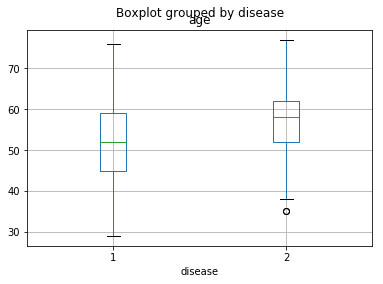

In [63]:
heart.boxplot(column='age',by='disease')

In [64]:
heart['gender'].value_counts()

1    183
0     87
Name: gender, dtype: int64

In [65]:
CT_2=pd.crosstab(heart['disease'],heart['gender'])  
CT_2

gender,0,1
disease,,
1,67,83
2,20,100


In [70]:
n1= CT_2.iloc[:,0].sum()
n2= CT_2.iloc[:,1].sum()
x1= CT_2.iloc[1,0]
x2= CT_2.iloc[1,1]
n2,n1,x2,x1

(183, 87, 100, 20)

In [71]:
p1=x1/n1
p2= x2/n2
p1,p2

(0.22988505747126436, 0.546448087431694)

In [72]:
z,p=twosampz(x1,x2,n1,n2)
print(z,p)

-4.892 0.0


In [73]:
#inference:According to this hospital, There is a strong evidence of rejecting HA female were high risk of heart disease 
# than male 

27755.559999999998

In [75]:
27755*4

111020

In [76]:
216**2

46656

In [77]:
46656*4

186624

In [78]:
83.3**2

6938.889999999999

In [79]:
6939*4


27756

In [80]:
111020+186624+27756

325400

In [81]:
325400/9

36155.555555555555

In [82]:
100/36155

0.0027658691743880515